### 📖Single neuron in keras tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x = np.array([-40, -10,  0,  8, 15, 22], dtype = float).reshape(-1,1) #Celsius
y = np.array([-40,  14, 32, 46.4, 59, 71.6],  dtype=float) #Fahrenheit
x.shape

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

opt = keras.optimizers.SGD(learning_rate=0.002)
model.compile(optimizer= opt, loss = "mean_squared_error")

history = model.fit(x, y, epochs=1500)

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

In [ ]:
model.predict([75])

In [ ]:
#by hand
(75*1.8)+32

### 📖Predict weather data
The scenario: The humidity sensor of a weather station has failed. Now a model needs to be set up that is based on historical data in order to approximate current data gaps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split


In [26]:
df = pd.read_csv("./Data/RUB_Weather.csv", sep=",")
df.head()

,Datum,temp_mean_all,surface_temp_mean_all,relhum_mean_all,windspeed_mean,precipitation_sum_all,pressure_mean_all,global_radiation_short_wave_mean,global_radiation_long_wave_mean,precipitation_sum_730,precipitation_sum_550
0,01/11/2020,14.34,13.49,85.92,1.62,0.4,996.40,31.07,371.83,1.8,1.8
1,02/11/2020,16.61,15.46,82.22,2.71,3.7,994.49,19.26,382.23,2.2,2.2
2,03/11/2020,9.78,8.91,74.91,1.88,0.0,1006.25,65.65,289.45,0.0,0.0
3,04/11/2020,5.74,4.08,86.24,1.20,0.0,1015.95,55.58,271.99,0.0,0.0
4,05/11/2020,3.83,2.38,91.50,0.65,0.0,1022.44,55.81,278.90,0.0,0.0


### 📖Turn Dates into Day of Years

In [27]:
df["Datum"] = pd.to_datetime(df["Datum"], format="%d/%m/%Y")
df["DOY"] = df["Datum"].dt.dayofyear
df.dtypes


Datum                               datetime64[ns]
temp_mean_all                              float64
surface_temp_mean_all                      float64
relhum_mean_all                            float64
windspeed_mean                             float64
precipitation_sum_all                      float64
pressure_mean_all                          float64
global_radiation_short_wave_mean           float64
global_radiation_long_wave_mean            float64
precipitation_sum_730                      float64
precipitation_sum_550                      float64
DOY                                          int32
dtype: object

In [28]:
df.dropna(inplace=True)
df.drop(["Datum"], axis=1, inplace=True)
df.head()

,temp_mean_all,surface_temp_mean_all,relhum_mean_all,windspeed_mean,precipitation_sum_all,pressure_mean_all,global_radiation_short_wave_mean,global_radiation_long_wave_mean,precipitation_sum_730,precipitation_sum_550,DOY
0,14.34,13.49,85.92,1.62,0.4,996.40,31.07,371.83,1.8,1.8,306
1,16.61,15.46,82.22,2.71,3.7,994.49,19.26,382.23,2.2,2.2,307
2,9.78,8.91,74.91,1.88,0.0,1006.25,65.65,289.45,0.0,0.0,308
3,5.74,4.08,86.24,1.20,0.0,1015.95,55.58,271.99,0.0,0.0,309
4,3.83,2.38,91.50,0.65,0.0,1022.44,55.81,278.90,0.0,0.0,310


### 📖Divide data into x and y data

In [30]:
x = df.drop(["relhum_mean_all"], axis=1)
y= df["relhum_mean_all"]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [33]:
a = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
print(type(a[0]))

<class 'pandas.core.frame.DataFrame'>


In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
input_size = X_train.shape[1]
print(input_size)
print(X_train.shape)
print(y_train.shape)

10
(340, 10)
(340,)


### 📖Normalise the data
As we know that the maximum relative humidity can be 100%, we can just divide the y data by 100

In [47]:
#Normalizing the y data
y_train = y_train/100 
y_test =y_test/100
print(y_train.max(), y_test.max())

0.9884000000000001 0.9795


### 📖Normalise the input data
One option to normalise input data is the layer normalization.
There are also several other options to normalise the input data.

In [48]:
layer = keras.layers.experimental.preprocessing.Normalization()
layer.adapt(X_train)

### 📖Build and train the model

In [51]:
model = Sequential()
model.add(layer)
model.add(Dense(128, activation="relu", input_shape=(input_size,)))
model.add(Dense(256, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt, loss="mean_squared_error") #loss=cost function

history = model.fit(X_train, y_train, epochs=200, batch_size=68)

Epoch 1/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0389
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 7/200
5/5 [==============================] - 0s 1000us/step - loss: 0.0111
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 13/200
5/5 [==============================] - 0s 2ms

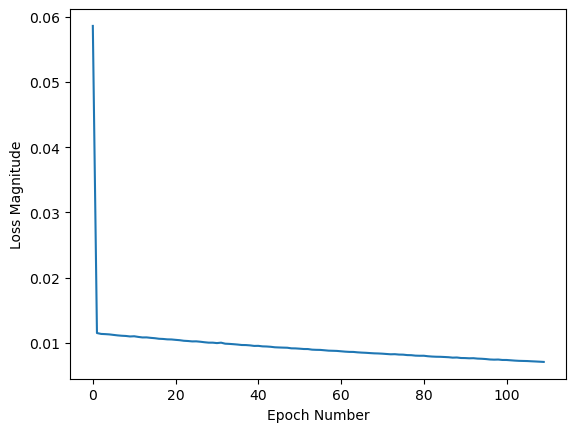

In [11]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

In [60]:
position = 20
point = X_test.iloc[position].values.reshape(1,10)
print(model.predict(point)[0,0])
print(y_test.iloc[position])

1/1 [==============================] - 0s 16ms/step
0.78740346
0.7818999999999999
